<a href="https://colab.research.google.com/github/alison-lui/Landry_qPCR/blob/main/B3P118_CF_LUV_(POPG_%2B_POPC_%2B_mix)_%2B_LNP_(200oi10_%2B_304oi10_%2B_306o10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from natsort import natsorted
import seaborn as sns
from matplotlib.colors import LogNorm

from google.colab import drive
drive.mount('/content/gdrive')

#set colors
palette = 'plasma'
markersize=8

Mounted at /content/gdrive


# Load Data from 11-08-22

In [ ]:
path = r'/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/B3P118 - LUV + LNP.xlsx'
#workingdir = path

# upload well names and info
info = pd.read_excel(path, sheet_name='headers 11-08-22')

# drop nan
info = info.dropna()

# create header row
info['header'] = info["base"] + " - " + info["concentration"] + " " + info["addition"]
info.head()

,Well,base,addition,concentration,temperature,header
0,A1,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
1,A2,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
2,A3,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
3,A4,POPC LUV,PBS,1X,20,POPC LUV - 1X PBS
4,A5,POPC LUV,PBS,1X,20,POPC LUV - 1X PBS


In [ ]:
wdir = r'/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/qPCR - 11 8 22'

file = (r'2022-11-08 CF-LUV + LNP - t0 -  Quantification Amplification Results_FAM.csv',
        r'2022-11-08 CF-LUV + LNP - post-addition -  Quantification Amplification Results_FAM.csv',
        r'2022-11-08 CF-LUV + LNP post-Triton -  Quantification Amplification Results_FAM.csv',
        r'2022-11-08 CF-LUV + LNP post-post-Triton -  Quantification Amplification Results_FAM.csv')

dt =  [5/60, 5.0, 2.0, 2.0] # values in minutes. one value for each file.

In [ ]:
final_timestamp = 0.0

df_main = pd.DataFrame()

for file_index in np.arange(0,len(file)):

  # upload fluor data from first file
  df = pd.read_csv(os.path.join(wdir, file[file_index]))
  df = df.drop(df.columns[0], axis=1)

  # add time stamp column
  df['Time (min)'] = df['Cycle']*dt[file_index] + final_timestamp

  # set time stamp column as index
  df = df.set_index('Time (min)')
  df

  # reset "final_timestamp"
  final_timestamp = df.index.max()

  # join dataframe onto previous dataframe
  df_main = pd.concat([df_main, df])

In [ ]:
df_main.head(10)

,Cycle,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time (min),,,,,,,,,,,,,,,,,,,,,
0.083333,1,8040.762274,8054.819288,8623.393746,9409.369572,8579.158091,8335.365234,2402.557415,2392.602538,2394.220654,...,20582.873763,9395.193980,16589.073203,2363.712877,2425.542857,2369.881089,2375.903154,2366.868837,2385.357127,2420.151252
0.166667,2,8043.563722,8021.932403,8594.727332,9381.623473,8559.013623,8327.922683,2403.345734,2390.026289,2392.997308,...,20572.829343,9317.296052,16575.780840,2357.204060,2419.927273,2368.749726,2371.734896,2366.291322,2379.283093,2422.570618
0.250000,3,8058.554228,8007.073650,8600.907987,9407.607016,8563.037442,8331.749360,2395.167076,2389.223819,2394.338499,...,20563.345116,9261.857532,16552.625584,2361.122477,2419.704514,2368.696781,2370.051880,2361.478452,2376.862507,2420.782688
5.250000,1,8205.014200,8271.721950,8775.007680,9755.453110,8944.690249,8672.270016,2403.332803,2387.527872,2393.601905,...,21083.265818,8746.171452,16943.678688,2364.752258,2428.277941,2364.936223,2379.308956,2368.420833,2389.078891,2417.705780
10.250000,2,8238.452982,8423.256833,8830.222709,9843.423760,9152.768421,8780.912144,2404.609094,2396.258182,2391.630254,...,21246.283663,8376.589125,17146.339393,2360.859704,2429.343428,2370.064811,2377.796974,2362.621527,2391.393343,2429.935094
15.250000,3,8245.119658,8533.607839,8880.717095,9918.455340,9307.749364,8844.582755,2400.611626,2396.337233,2397.731370,...,21317.197733,8444.322592,17249.773881,2365.383938,2429.106518,2377.310222,2377.823081,2371.523848,2387.671823,2417.836556
20.250000,4,8257.112062,8634.991869,8897.785386,9950.092529,9433.288017,8893.446338,2403.727572,2396.522175,2399.914070,...,21396.159440,8480.694087,17338.877603,2359.808367,2429.027466,2372.602266,2379.545866,2373.325929,2400.913437,2423.544123
25.250000,5,8277.560753,8726.605485,8917.602695,9969.712786,9507.939787,8935.052582,2404.648092,2399.335539,2401.571183,...,21436.793732,8506.889158,17361.146226,2363.450305,2428.225202,2373.930728,2380.808209,2369.696349,2385.989010,2430.526724
30.250000,6,8284.858161,8788.262957,8934.156881,9999.206929,9526.453619,8960.929963,2402.491295,2402.083594,2399.348266,...,21480.155069,8538.789128,17402.718028,2366.987902,2433.668570,2376.612666,2375.021632,2373.022898,2394.154534,2428.448975


In [ ]:
df_melted = pd.melt(df_main.reset_index(), id_vars=["Time (min)"], value_vars=df_main.columns)
df_melted = df_melted.rename(columns={"variable":"Well","value":"RFU"})
df_melted.head()

,Time (min),Well,RFU
0,0.083333,Cycle,1.0
1,0.166667,Cycle,2.0
2,0.250000,Cycle,3.0
3,5.250000,Cycle,1.0
4,10.250000,Cycle,2.0


In [ ]:
# join fluorescence info and well info
df_melted = df_melted.merge(info, on="Well")
df_melted = df_melted.sort_values(by="base", ascending=False)
df_melted.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header
3276,0.083333,D4,8091.112220,POPC LUV,304oi10 LNP,0.1X,20,POPC LUV - 0.1X 304oi10 LNP
3577,709.250000,D5,31984.952909,POPC LUV,304oi10 LNP,0.1X,20,POPC LUV - 0.1X 304oi10 LNP
3593,15.250000,D6,10143.705253,POPC LUV,304oi10 LNP,0.1X,20,POPC LUV - 0.1X 304oi10 LNP
3592,10.250000,D6,9617.396019,POPC LUV,304oi10 LNP,0.1X,20,POPC LUV - 0.1X 304oi10 LNP
3591,5.250000,D6,9171.625619,POPC LUV,304oi10 LNP,0.1X,20,POPC LUV - 0.1X 304oi10 LNP


# Load Data from 11-09-22

In [ ]:
path = r'/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/B3P118 - LUV + LNP.xlsx'
#workingdir = path

# upload well names and info
info_1109 = pd.read_excel(path, sheet_name='headers 11-09-22')

# drop nan
info_1109 = info_1109.dropna()

# create header row
info_1109['header'] = info_1109["base"] + " - " + info_1109["concentration"] + " " + info_1109["addition"]
info_1109.head()

,Well,base,addition,concentration,temperature,header
9,A10,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
10,A11,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
11,A12,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
21,B10,POPG LUV,200oi10 LNP,1X,20,POPG LUV - 1X 200oi10 LNP
22,B11,POPG LUV,200oi10 LNP,1X,20,POPG LUV - 1X 200oi10 LNP


In [ ]:
wdir = r'/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/qPCR 11 9 22/'

file = (r'2022-11-09 POPG LUV + LNP t0 -  Quantification Amplification Results_FAM.csv',
        r'2022-11-09 POPG LUV + LNP post-addition -  Quantification Amplification Results_FAM.csv',
        r'2022-11-09 POPG LUV + LNP post-post-addition -  Quantification Amplification Results_FAM.csv',
        r'2022-11-09 POPG LUV + LNP post-Triton -  Quantification Amplification Results_FAM.csv')
dt =  [5/60, 5.0, 5.0, 2.0] # values in minutes. one value for each file.

In [ ]:
final_timestamp = 0.0

df_main_1109 = pd.DataFrame()


for file_index in np.arange(0,len(file)):

  # upload fluor data from first file
  df = pd.read_csv(os.path.join(wdir, file[file_index]))
  df = df.drop(df.columns[0], axis=1)

  # add time stamp column
  df['Time (min)'] = df['Cycle']*dt[file_index] + final_timestamp

  # set time stamp column as index
  df = df.set_index('Time (min)')
  df

  # reset "final_timestamp"
  final_timestamp = df.index.max()

  # join dataframe onto previous dataframe from previous data
  df_main_1109 = pd.concat([df_main_1109, df])

In [ ]:
df_main_1109.head(10)

,Cycle,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Time (min),,,,,,,,,,,,,,,,,,,,,
0.083333,1,38302.112022,40863.649800,42357.953366,59223.689232,61372.051199,61673.516513,43239.574669,44938.248794,50994.241289,...,56334.089705,62573.856428,62435.775915,62441.971209,58374.176499,48858.293334,58113.521275,2331.826090,2349.511910,2383.608235
0.166667,2,37952.841049,40732.092498,41999.949643,58605.701735,61201.366335,61609.849805,42862.633721,44623.487215,50902.549363,...,55707.045444,62588.928913,62427.050972,62430.857155,58843.781413,48758.278554,58131.623092,2335.533703,2337.177681,2376.573872
0.250000,3,37774.539225,40494.145089,41875.012806,58250.361439,61008.763047,61534.812724,42680.022543,44509.364065,50895.191167,...,55184.791073,62598.178383,62417.671600,62424.140160,59544.440367,48651.908660,58254.479925,2336.336372,2336.928038,2377.981142
5.250000,1,40433.503804,42556.389900,44721.479737,60955.687283,61611.443883,62162.095169,46847.192168,47381.744274,52002.197158,...,56681.093500,62644.098522,62475.314783,62486.827024,61525.876977,49935.388831,59024.152665,2337.611687,2347.026624,2380.795278
10.250000,2,42020.338743,45046.754218,46216.470496,61556.287406,62033.426652,62265.740470,49392.502159,50782.059686,52552.828925,...,57259.758295,62657.180081,62498.659375,62523.303924,61620.028291,50516.259261,59602.083551,2339.584315,2344.094642,2382.833050
15.250000,3,43502.896172,47085.107807,47290.266930,61796.840748,62080.750774,62292.718084,50164.298192,51903.036787,52839.443703,...,57509.724010,62662.811806,62511.427219,62532.125047,61638.550377,51032.568576,59578.394263,2338.689663,2335.323875,2387.421982
20.250000,4,44081.154771,48002.210723,48442.693494,61947.461560,62102.172179,62299.168520,50536.496445,52333.748913,52859.455059,...,57840.909797,62665.674702,62522.983814,62537.275545,61661.689408,51308.179632,59757.286046,2338.322175,2342.200822,2381.478927
25.250000,5,44253.592585,48482.371272,48854.256828,61986.068554,62120.744974,62311.803652,50786.212889,52613.208085,52965.293682,...,58040.829035,62667.539281,62536.391876,62551.370670,61690.006069,51538.658195,59953.906428,2336.782912,2343.252935,2384.884526
30.250000,6,44470.619070,48730.390209,49084.455051,61999.865874,62133.152560,62317.446008,50974.457376,52841.798271,52862.824019,...,58329.042081,62669.972761,62539.793482,62550.919248,61693.911190,51826.351486,59855.825206,2335.941602,2348.249970,2389.526809


In [ ]:
df_melted_1109 = pd.melt(df_main_1109.reset_index(), id_vars=["Time (min)"], value_vars=df_main_1109.columns)
df_melted_1109 = df_melted_1109.rename(columns={"variable":"Well","value":"RFU"})
df_melted_1109.head()

,Time (min),Well,RFU
0,0.083333,Cycle,1.0
1,0.166667,Cycle,2.0
2,0.250000,Cycle,3.0
3,5.250000,Cycle,1.0
4,10.250000,Cycle,2.0


In [ ]:
# join fluorescence info and well info
df_melted_1109 = df_melted_1109.merge(info_1109, on="Well")
df_melted_1109.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header
0,0.083333,A10,8342.137312,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
1,0.166667,A10,8343.097642,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
2,0.250000,A10,8337.259276,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
3,5.250000,A10,8503.667565,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
4,10.250000,A10,8533.556840,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS


# Join 11-08 and 11-09 data

In [ ]:
info = pd.concat([info, info_1109], ignore_index=True)
info.head()

,Well,base,addition,concentration,temperature,header
0,A1,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
1,A2,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
2,A3,1:1 POPG:POPC LUV,PBS,1X,20,1:1 POPG:POPC LUV - 1X PBS
3,A4,POPC LUV,PBS,1X,20,POPC LUV - 1X PBS
4,A5,POPC LUV,PBS,1X,20,POPC LUV - 1X PBS


In [ ]:
df_main = pd.concat([df_main_1109, df_main], ignore_index=True)
df_main.head()

,Cycle,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,1,38302.112022,40863.649800,42357.953366,59223.689232,61372.051199,61673.516513,43239.574669,44938.248794,50994.241289,...,56334.089705,62573.856428,62435.775915,62441.971209,58374.176499,48858.293334,58113.521275,2331.826090,2349.511910,2383.608235
1,2,37952.841049,40732.092498,41999.949643,58605.701735,61201.366335,61609.849805,42862.633721,44623.487215,50902.549363,...,55707.045444,62588.928913,62427.050972,62430.857155,58843.781413,48758.278554,58131.623092,2335.533703,2337.177681,2376.573872
2,3,37774.539225,40494.145089,41875.012806,58250.361439,61008.763047,61534.812724,42680.022543,44509.364065,50895.191167,...,55184.791073,62598.178383,62417.671600,62424.140160,59544.440367,48651.908660,58254.479925,2336.336372,2336.928038,2377.981142
3,1,40433.503804,42556.389900,44721.479737,60955.687283,61611.443883,62162.095169,46847.192168,47381.744274,52002.197158,...,56681.093500,62644.098522,62475.314783,62486.827024,61525.876977,49935.388831,59024.152665,2337.611687,2347.026624,2380.795278
4,2,42020.338743,45046.754218,46216.470496,61556.287406,62033.426652,62265.740470,49392.502159,50782.059686,52552.828925,...,57259.758295,62657.180081,62498.659375,62523.303924,61620.028291,50516.259261,59602.083551,2339.584315,2344.094642,2382.833050


In [ ]:
df_melted = pd.concat([df_melted_1109, df_melted], ignore_index=True)
df_melted.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header
0,0.083333,A10,8342.137312,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
1,0.166667,A10,8343.097642,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
2,0.250000,A10,8337.259276,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
3,5.250000,A10,8503.667565,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS
4,10.250000,A10,8533.556840,POPG LUV,PBS,1X,20,POPG LUV - 1X PBS


### Sort data based on lipid name

In [ ]:
# in order to sort "POPC", then "1:1 PG:PC", then "POPG", we make a custom sort
from pandas.api.types import CategoricalDtype
cat_lipid_order = CategoricalDtype(
    ['POPC LUV','1:1 POPG:POPC LUV','POPG LUV'], 
    ordered=True
)

df_melted["base"] = df_melted["base"].astype(cat_lipid_order)
df_melted = df_melted.sort_values(by="base")
df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header
5197,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP
4372,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP
4371,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP
4370,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP
4369,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP
...,...,...,...,...,...,...,...,...
2556,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP
2555,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP
2554,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP
2882,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP


## Plots of Raw Data

In [ ]:
'''
print("This cell creates {} plots".format(len(df_melted.base.unique())*len(df_melted[df_melted["addition"] != 'PBS']["addition"].unique())))

for base in df_melted.base.unique():
  for add in df_melted[df_melted["addition"] != 'PBS']["addition"].unique():

    fig, ax = plt.subplots()

    temp_data = df_melted[(df_melted["addition"] == add) | (df_melted["addition"] == "PBS")]
    temp_data = temp_data[temp_data["base"] == base]

    sns.lineplot(data=temp_data, x="Time (min)", y="RFU", hue="header", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
'''

'\nprint("This cell creates {} plots".format(len(df_melted.base.unique())*len(df_melted[df_melted["addition"] != \'PBS\']["addition"].unique())))\n\nfor base in df_melted.base.unique():\n  for add in df_melted[df_melted["addition"] != \'PBS\']["addition"].unique():\n\n    fig, ax = plt.subplots()\n\n    temp_data = df_melted[(df_melted["addition"] == add) | (df_melted["addition"] == "PBS")]\n    temp_data = temp_data[temp_data["base"] == base]\n\n    sns.lineplot(data=temp_data, x="Time (min)", y="RFU", hue="header", ax=ax)\n    ax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\n'

# Normalize Data

In [ ]:
# Calculate averages of N=3 triplicate experiments for each time point
# Normalize every well to its first (not minimum) and maximum (not last) fluorescence value, then multiply by 100%

In [ ]:
pd.pivot_table(data=df_melted[df_melted["header"]=="POPG LUV - 1X PBS"], values="RFU", index="Time (min)", columns="Well")

Well,A10,A11,A12
Time (min),,,
0.083333,8342.137312,8416.708246,8437.708617
0.166667,8343.097642,8404.939333,8427.530493
0.250000,8337.259276,8402.244489,8437.959177
5.250000,8503.667565,8561.433717,8600.632527
10.250000,8533.556840,8555.240374,8627.733528
...,...,...,...
874.250000,41649.448980,43781.949899,38111.681852
876.250000,41910.154953,44020.490223,39072.963638
878.250000,42163.099898,44266.498335,40266.738319


In [ ]:
# create pivot table with aggfunc=mean

df_pivot = pd.pivot_table(data=df_melted, values="RFU", index="Time (min)", columns="header", aggfunc="mean")
df_pivot

# add back in to df_melted
for i in df_melted.index:
  df_melted.loc[i,"Average RFU"] = df_pivot.loc[df_melted.loc[i,"Time (min)"],df_melted.loc[i,"header"]]

df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU
5197,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961
4372,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,16229.483895
4371,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14542.142761
4370,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14662.481203
4369,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14776.777681
...,...,...,...,...,...,...,...,...,...
2556,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784
2555,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351
2554,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10663.296412
2882,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP,20066.003862


In [ ]:
# create pivot table with aggfunc=stdev

df_pivot = pd.pivot_table(data=df_melted, values="RFU", index="Time (min)", columns="header", aggfunc="std")
df_pivot

# add back in to df_melted
for i in df_melted.index:
  df_melted.loc[i,"RFU std"] = df_pivot.loc[df_melted.loc[i,"Time (min)"],df_melted.loc[i,"header"]]

df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std
5197,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038
4372,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,16229.483895,1480.756857
4371,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14542.142761,1423.127259
4370,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14662.481203,1420.793879
4369,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14776.777681,1425.360778
...,...,...,...,...,...,...,...,...,...,...
2556,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784,1812.854852
2555,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351,182.070372
2554,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10663.296412,187.858059
2882,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP,20066.003862,1093.824392


### Test calculation for averaging

In [ ]:
# for a given well (A10), find the minimum triplicate-averaged RFU within the t0 space (lowest 3 Time values)

RFU_min = df_melted[df_melted["Well"]=="A10"].loc[df_melted["Time (min)"] <= df_melted["Time (min)"].iloc[2]].sort_values(by="Average RFU").iloc[0]["Average RFU"]
print(RFU_min)

8391.855822559963


In [ ]:
# for a given well (A10), find the maximum triplicate-averaged RFU
RFU_max = df_melted[df_melted["Well"]=="A10"].sort_values(by="Average RFU", ascending=False).iloc[0]["Average RFU"]
print(RFU_max)

42663.032001119136


In [ ]:
# for a given well (A10), apply normalization function 
RFU_norm = df_melted[df_melted["Well"]=="A10"]["RFU"].apply(lambda x: 100*(x-RFU_min)/(RFU_max-RFU_min))
print(RFU_norm)

86     0.549638
85     0.560230
84     0.538781
83     0.540661
82     0.527732
         ...   
154    0.670810
153    0.664251
152    0.644412
151    0.633667
0     -0.145074
Name: RFU, Length: 183, dtype: float64


In [ ]:
# create small pd dataframe with Well, Time, RFU, and RFU Norm
df_temp = df_melted[df_melted["Well"]=="A10"].loc[:,["Time (min)","Well","RFU"]]
df_temp["RFU Norm"] = RFU_norm
df_temp

,Time (min),Well,RFU,RFU Norm
86,420.250000,A10,8580.223092,0.549638
85,415.250000,A10,8583.853114,0.560230
84,410.250000,A10,8576.502546,0.538781
83,405.250000,A10,8577.146670,0.540661
82,400.250000,A10,8572.715635,0.527732
...,...,...,...,...
154,760.250000,A10,8621.750255,0.670810
153,755.250000,A10,8619.502413,0.664251
152,750.250000,A10,8612.703251,0.644412
151,745.250000,A10,8609.021013,0.633667


In [ ]:
# join small dataframe with RFU avg onto larger df_melted dataframe, merging on all of the columns Time, Well, and RFU just to be sure :)
df_melted = df_melted.merge(df_temp, how="outer", on=["Time (min)","Well","RFU"])
df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm
0,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN
1,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,16229.483895,1480.756857,NaN
2,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14542.142761,1423.127259,NaN
3,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14662.481203,1420.793879,NaN
4,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14776.777681,1425.360778,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10390,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784,1812.854852,NaN
10391,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351,182.070372,NaN
10392,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10663.296412,187.858059,NaN
10393,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP,20066.003862,1093.824392,NaN


In [ ]:
df_temp.index

Int64Index([ 86,  85,  84,  83,  82,  81,  80,  79,  78,  77,
            ...
            159, 158, 157, 156, 155, 154, 153, 152, 151,   0],
           dtype='int64', length=183)

In [ ]:
df_melted["% of Maximum RFU"] = pd.Series(dtype="float64")
df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU
0,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,NaN
1,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,16229.483895,1480.756857,NaN,NaN
2,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14542.142761,1423.127259,NaN,NaN
3,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14662.481203,1420.793879,NaN,NaN
4,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14776.777681,1425.360778,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10390,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784,1812.854852,NaN,NaN
10391,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351,182.070372,NaN,NaN
10392,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10663.296412,187.858059,NaN,NaN
10393,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP,20066.003862,1093.824392,NaN,NaN


### For Loop to create averages and stdev!

In [ ]:
# Repeat for every well!
for well in df_melted["Well"].unique():

  # for a given well, find the minimum triplicate-averaged RFU within the t0 space (lowest 3 Time values)
  RFU_min = df_melted[df_melted["Well"] == well].loc[df_melted["Time (min)"] <= df_melted["Time (min)"].iloc[2]].sort_values(by="Average RFU").iloc[0]["Average RFU"]

  # for a given well, find the maximum triplicate-averaged RFU
  RFU_max = df_melted[df_melted["Well"] == well].sort_values(by="Average RFU", ascending=False).iloc[0]["Average RFU"]

  # for a given well, apply normalization function to avg and stdev.
  RFU_norm = df_melted[df_melted["Well"] == well]["RFU"].apply(lambda x: 100*(x-RFU_min)/(RFU_max-RFU_min))
  RFU_stdv = df_melted[df_melted["Well"] == well]["RFU std"].apply(lambda x: 100*(x)/(RFU_max-RFU_min))

  # create small pd dataframe with Well, Time, RFU, and RFU Norm
  df_temp = df_melted[df_melted["Well"] == well].loc[:,["Time (min)","Well","RFU"]]
  df_temp["RFU Norm"] = RFU_norm

  # join small dataframe with RFU avg onto larger df_melted dataframe, using the indices from df_temp
  df_melted.loc[df_temp.index,"% of Maximum RFU"] = RFU_norm
  df_melted.loc[df_temp.index,"RFU Std Normalized"] = RFU_stdv

# Did it work?!
df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU,RFU Std Normalized
0,365.250000,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,20.558136,1.431411
1,335.250000,E4,16564.297879,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,16229.483895,1480.756857,NaN,27.642003,5.311553
2,260.250000,E4,14861.547234,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14542.142761,1423.127259,NaN,21.534146,5.104833
3,265.250000,E4,14987.129127,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14662.481203,1420.793879,NaN,21.984615,5.096463
4,270.250000,E4,15098.816878,POPC LUV,304oi10 LNP,0.01X,20,POPC LUV - 0.01X 304oi10 LNP,14776.777681,1425.360778,NaN,22.385245,5.112844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,872.250000,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784,1812.854852,NaN,99.811390,4.807577
10391,870.250000,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351,182.070372,NaN,4.333175,0.482839
10392,865.250000,E11,10598.777380,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10663.296412,187.858059,NaN,4.307783,0.498188
10393,675.250000,F10,19791.913788,POPG LUV,306o10 LNP,1X,20,POPG LUV - 1X 306o10 LNP,20066.003862,1093.824392,NaN,34.731298,3.867731


## Plot Normalized Data

In [ ]:
'''
print("This cell creates {} plots".format(len(df_melted.base.unique())*len(df_melted[df_melted["addition"] != 'PBS']["addition"].unique())))

for base in df_melted.base.unique():
  for add in df_melted[df_melted["addition"] != 'PBS']["addition"].unique():

    fig, ax = plt.subplots()

    temp_data = df_melted[(df_melted["addition"] == add) | (df_melted["addition"] == "PBS")]
    temp_data = temp_data[temp_data["base"] == base]

    sns.lineplot(data=temp_data, x="Time (min)", y="% of Maximum RFU", hue="header", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
'''

'\nprint("This cell creates {} plots".format(len(df_melted.base.unique())*len(df_melted[df_melted["addition"] != \'PBS\']["addition"].unique())))\n\nfor base in df_melted.base.unique():\n  for add in df_melted[df_melted["addition"] != \'PBS\']["addition"].unique():\n\n    fig, ax = plt.subplots()\n\n    temp_data = df_melted[(df_melted["addition"] == add) | (df_melted["addition"] == "PBS")]\n    temp_data = temp_data[temp_data["base"] == base]\n\n    sns.lineplot(data=temp_data, x="Time (min)", y="% of Maximum RFU", hue="header", ax=ax)\n    ax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\n'

# Compare same LNP, different LUV Compositions

In [ ]:
'''
# THIS CELL CREATES A LOT OF PLOTS!!

for add in df_melted[df_melted["addition"] != 'PBS']["addition"].unique():
  for conc in df_melted[df_melted["addition"]==add]["concentration"].unique():

    fig, ax = plt.subplots()

    temp_data = df_melted[df_melted["addition"] == add]
    temp_data = temp_data[temp_data["concentration"] == conc]

    sns.lineplot(data=temp_data, x="Time (min)", y="% of Maximum RFU", hue="header", ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
'''

'\n# THIS CELL CREATES A LOT OF PLOTS!!\n\nfor add in df_melted[df_melted["addition"] != \'PBS\']["addition"].unique():\n  for conc in df_melted[df_melted["addition"]==add]["concentration"].unique():\n\n    fig, ax = plt.subplots()\n\n    temp_data = df_melted[df_melted["addition"] == add]\n    temp_data = temp_data[temp_data["concentration"] == conc]\n\n    sns.lineplot(data=temp_data, x="Time (min)", y="% of Maximum RFU", hue="header", ax=ax)\n    ax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\n'

# Hill-Like Equation

$$ F = 100*(1+(τ/t)^n)^{-1} $$

F = normalized fluorescence signal

τ = fusion half-time

t = time

n = Hill Coefficient

100 (because the maximum % fluorescence is 100, not 1)

In [ ]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 11.5 MB/s eta 0:00:00


In [ ]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from lmfit import Parameters, minimize, report_fit

In [ ]:
# create pivot table from data only up to time=600
df_pivot = pd.pivot_table(data=df_melted[df_melted["Time (min)"] <= 600], values="% of Maximum RFU", index="Time (min)", columns=["base","addition","concentration"], aggfunc="mean")
df_pivot.head()

base             POPC LUV                                         \
addition      200oi10 LNP              304oi10 LNP                 
concentration        0.5X         1X         0.01X          0.1X   
Time (min)                                                         
0.083333         0.071661   0.000000  1.184238e-15  2.725023e-02   
0.166667         0.015855   0.004116  1.210681e-03  2.929733e-03   
0.250000         0.000000   0.074284  3.311198e-02  1.036208e-15   
5.250000         1.489069   4.607846  1.186934e+00  1.066686e+00   
10.250000        2.865215  11.822619  1.657686e+00  2.288480e+00   

base                                                    1:1 POPG:POPC LUV  \
addition         306o10 LNP                         PBS       200oi10 LNP   
concentration          0.5X            1X            1X              0.5X   
Time (min)                                                                  
0.083333       1.027904e-01  1.815372e-01  7.665761e-02      2.461367e-02   
0.166667       3.202084e-02  8.383989e-02 -2.479498e-15      1.628327e-15   
0.250000      -2.294461e-15 -2.516506e-15  4.687314e-02      6.012345e-04   
5.250000       4.066540e-01  3.348895e-01  1.529261e+00      7.052896e-01   
10.250000      7.918143e-01  7.164477e-01  2.089913e+00      1.594864e+00   

base                                       ...                           \
addition                      304oi10 LNP  ... 306o10 LNP                 
concentration            1X         0.01X  ...       0.5X            1X   
Time (min)                                 ...                            
0.083333       1.067703e-02  3.700743e-17  ...   0.012071  8.044650e-02   
0.166667       1.924387e-15  2.604130e-02  ...   0.009562  2.226705e-02   
0.250000       8.326293e-03  8.747307e-02  ...   0.000000 -1.776357e-15   
5.250000       1.741527e+00  1.528636e+00  ...   0.466075  3.098534e-01   
10.250000      3.754771e+00  2.098003e+00  ...   0.761454  7.341396e-01   

base                             POPG LUV                              \
addition                PBS   200oi10 LNP                 304oi10 LNP   
concentration            1X          0.5X            1X         0.01X   
Time (min)                                                              
0.083333       5.912866e-02  6.586630e-02  1.471305e-01 -3.219647e-15   
0.166667       1.850372e-15  4.133325e-03  2.970083e-02  3.361566e-02   
0.250000       6.352894e-03 -1.480297e-16  2.072416e-15  9.982843e-02   
5.250000       5.953142e-01  1.287534e+00  1.100551e+00  1.440732e+00   
10.250000      8.370433e-01  1.625704e+00  3.298654e+00  1.997356e+00   

base                                                               
addition                       306o10 LNP                     PBS  
concentration          0.1X          0.5X        1X            1X  
Time (min)                                                         
0.083333      -1.628327e-15  5.187224e-03  0.497619  2.041240e-02  
0.166667       1.506104e-02  1.850372e-15  0.371312  1.767105e-15  
0.250000       1.763216e-02  4.965568e-03  0.273083  1.843603e-03  
5.250000       7.757717e-01  3.458166e-01  0.000000  4.767528e-01  
10.250000      1.023520e+00  4.046017e-01  0.205672  5.261596e-01  

[5 rows x 21 columns]

In [ ]:
# Define Hill Equation
def FHill(t,tau,n):
  return 100 * (1+(tau/tdata) ** n) ** (-1)

# Define Hill Equation predicted fits from parameters

def FHill_dataset(params, i, t):
    """Calculate model lineshape from parameters for data set."""
    tau = params[f'tau_{i+1}']
    n = params[f'n_{i+1}']
    return FHill(t, tau, n)

# Define objective function

def Hillobjective(params, t, data):
    """Calculate total residual for fits of model to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - FHill_dataset(params, i, t)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

## Create ```xdata``` and ``` ydata ``` variables from real Avg RFU data



In [ ]:
df_pivot.head()

base             POPC LUV                                         \
addition      200oi10 LNP              304oi10 LNP                 
concentration        0.5X         1X         0.01X          0.1X   
Time (min)                                                         
0.083333         0.071661   0.000000  1.184238e-15  2.725023e-02   
0.166667         0.015855   0.004116  1.210681e-03  2.929733e-03   
0.250000         0.000000   0.074284  3.311198e-02  1.036208e-15   
5.250000         1.489069   4.607846  1.186934e+00  1.066686e+00   
10.250000        2.865215  11.822619  1.657686e+00  2.288480e+00   

base                                                    1:1 POPG:POPC LUV  \
addition         306o10 LNP                         PBS       200oi10 LNP   
concentration          0.5X            1X            1X              0.5X   
Time (min)                                                                  
0.083333       1.027904e-01  1.815372e-01  7.665761e-02      2.461367e-02   
0.166667       3.202084e-02  8.383989e-02 -2.479498e-15      1.628327e-15   
0.250000      -2.294461e-15 -2.516506e-15  4.687314e-02      6.012345e-04   
5.250000       4.066540e-01  3.348895e-01  1.529261e+00      7.052896e-01   
10.250000      7.918143e-01  7.164477e-01  2.089913e+00      1.594864e+00   

base                                       ...                           \
addition                      304oi10 LNP  ... 306o10 LNP                 
concentration            1X         0.01X  ...       0.5X            1X   
Time (min)                                 ...                            
0.083333       1.067703e-02  3.700743e-17  ...   0.012071  8.044650e-02   
0.166667       1.924387e-15  2.604130e-02  ...   0.009562  2.226705e-02   
0.250000       8.326293e-03  8.747307e-02  ...   0.000000 -1.776357e-15   
5.250000       1.741527e+00  1.528636e+00  ...   0.466075  3.098534e-01   
10.250000      3.754771e+00  2.098003e+00  ...   0.761454  7.341396e-01   

base                             POPG LUV                              \
addition                PBS   200oi10 LNP                 304oi10 LNP   
concentration            1X          0.5X            1X         0.01X   
Time (min)                                                              
0.083333       5.912866e-02  6.586630e-02  1.471305e-01 -3.219647e-15   
0.166667       1.850372e-15  4.133325e-03  2.970083e-02  3.361566e-02   
0.250000       6.352894e-03 -1.480297e-16  2.072416e-15  9.982843e-02   
5.250000       5.953142e-01  1.287534e+00  1.100551e+00  1.440732e+00   
10.250000      8.370433e-01  1.625704e+00  3.298654e+00  1.997356e+00   

base                                                               
addition                       306o10 LNP                     PBS  
concentration          0.1X          0.5X        1X            1X  
Time (min)                                                         
0.083333      -1.628327e-15  5.187224e-03  0.497619  2.041240e-02  
0.166667       1.506104e-02  1.850372e-15  0.371312  1.767105e-15  
0.250000       1.763216e-02  4.965568e-03  0.273083  1.843603e-03  
5.250000       7.757717e-01  3.458166e-01  0.000000  4.767528e-01  
10.250000      1.023520e+00  4.046017e-01  0.205672  5.261596e-01  

[5 rows x 21 columns]

In [ ]:
# xdata is time data (index from pivot table)
xdata = df_pivot.index.values
print(np.shape(xdata))

(122,)


In [ ]:
# ydata is actual values (in order as presented on pivot table). Transpose necessary for fitting.
ydata = df_pivot.to_numpy().T
print(ydata)
print(np.shape(ydata))

[[7.16607331e-02 1.58553453e-02 0.00000000e+00 ... 9.98248117e+01
  9.97455480e+01 9.98609901e+01]
 [0.00000000e+00 4.11604101e-03 7.42836880e-02 ... 9.99495687e+01
  9.98250295e+01 9.98987206e+01]
 [1.18423789e-15 1.21068086e-03 3.31119756e-02 ... 4.29550671e+01
  4.32243925e+01 4.34900608e+01]
 ...
 [5.18722388e-03 1.85037171e-15 4.96556750e-03 ... 9.41665814e+00
  9.46896913e+00 9.51784933e+00]
 [4.97619483e-01 3.71311548e-01 2.73083245e-01 ... 3.41341633e+01
  3.41640619e+01 3.42922403e+01]
 [2.04123992e-02 1.76710498e-15 1.84360332e-03 ... 7.28748715e-01
  7.41089751e-01 7.47459134e-01]]
(21, 122)


In [ ]:
df_pivot.head()

base             POPC LUV                                         \
addition      200oi10 LNP              304oi10 LNP                 
concentration        0.5X         1X         0.01X          0.1X   
Time (min)                                                         
0.083333         0.071661   0.000000  1.184238e-15  2.725023e-02   
0.166667         0.015855   0.004116  1.210681e-03  2.929733e-03   
0.250000         0.000000   0.074284  3.311198e-02  1.036208e-15   
5.250000         1.489069   4.607846  1.186934e+00  1.066686e+00   
10.250000        2.865215  11.822619  1.657686e+00  2.288480e+00   

base                                                    1:1 POPG:POPC LUV  \
addition         306o10 LNP                         PBS       200oi10 LNP   
concentration          0.5X            1X            1X              0.5X   
Time (min)                                                                  
0.083333       1.027904e-01  1.815372e-01  7.665761e-02      2.461367e-02   
0.166667       3.202084e-02  8.383989e-02 -2.479498e-15      1.628327e-15   
0.250000      -2.294461e-15 -2.516506e-15  4.687314e-02      6.012345e-04   
5.250000       4.066540e-01  3.348895e-01  1.529261e+00      7.052896e-01   
10.250000      7.918143e-01  7.164477e-01  2.089913e+00      1.594864e+00   

base                                       ...                           \
addition                      304oi10 LNP  ... 306o10 LNP                 
concentration            1X         0.01X  ...       0.5X            1X   
Time (min)                                 ...                            
0.083333       1.067703e-02  3.700743e-17  ...   0.012071  8.044650e-02   
0.166667       1.924387e-15  2.604130e-02  ...   0.009562  2.226705e-02   
0.250000       8.326293e-03  8.747307e-02  ...   0.000000 -1.776357e-15   
5.250000       1.741527e+00  1.528636e+00  ...   0.466075  3.098534e-01   
10.250000      3.754771e+00  2.098003e+00  ...   0.761454  7.341396e-01   

base                             POPG LUV                              \
addition                PBS   200oi10 LNP                 304oi10 LNP   
concentration            1X          0.5X            1X         0.01X   
Time (min)                                                              
0.083333       5.912866e-02  6.586630e-02  1.471305e-01 -3.219647e-15   
0.166667       1.850372e-15  4.133325e-03  2.970083e-02  3.361566e-02   
0.250000       6.352894e-03 -1.480297e-16  2.072416e-15  9.982843e-02   
5.250000       5.953142e-01  1.287534e+00  1.100551e+00  1.440732e+00   
10.250000      8.370433e-01  1.625704e+00  3.298654e+00  1.997356e+00   

base                                                               
addition                       306o10 LNP                     PBS  
concentration          0.1X          0.5X        1X            1X  
Time (min)                                                         
0.083333      -1.628327e-15  5.187224e-03  0.497619  2.041240e-02  
0.166667       1.506104e-02  1.850372e-15  0.371312  1.767105e-15  
0.250000       1.763216e-02  4.965568e-03  0.273083  1.843603e-03  
5.250000       7.757717e-01  3.458166e-01  0.000000  4.767528e-01  
10.250000      1.023520e+00  4.046017e-01  0.205672  5.261596e-01  

[5 rows x 21 columns]

## Example Plots

In [ ]:
# Sample Coefficients
tau = 30
n = 1.0

In [ ]:
tdata = xdata
Hdata = (1+(tau/tdata) ** n) ** (-1)

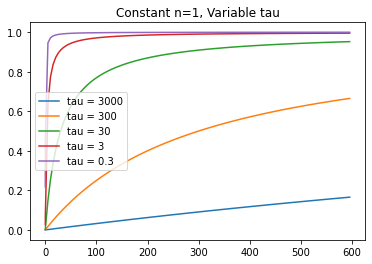

In [ ]:
# Example Plots
fig, ax = plt.subplots()
for tau in [3000,300,30,3,0.3]:
  Hdata = (1+(tau/tdata) ** n) ** (-1)
  ax.plot(tdata,Hdata, label="tau = "+str(tau))
ax.legend()
ax.set_title("Constant n=1, Variable tau");

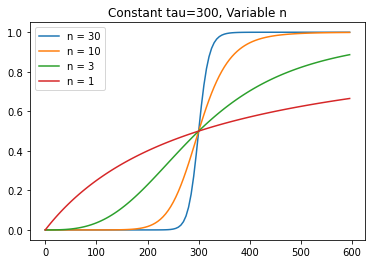

In [ ]:
# Example Plots
fig, ax = plt.subplots()
tau = 300
for n in [30,10,3,1]:
  Hdata = (1+(tau/tdata) ** n) ** (-1)
  ax.plot(tdata,Hdata, label="n = "+str(n))
ax.legend()
ax.set_title("Constant tau=300, Variable n");

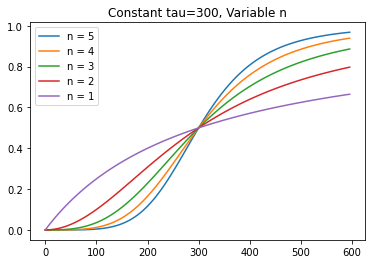

In [ ]:
# Example Plots
fig, ax = plt.subplots()
tau = 300
for n in [5,4,3,2,1]:
  Hdata = (1+(tau/tdata) ** n) ** (-1)
  ax.plot(tdata,Hdata, label="n = "+str(n))
ax.legend()
ax.set_title("Constant tau=300, Variable n");

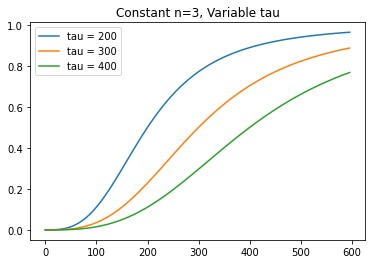

In [ ]:
# Example Plots
fig, ax = plt.subplots()
n=3
for tau in [200,300,400]:
  Hdata = (1+(tau/tdata) ** n) ** (-1)
  ax.plot(tdata,Hdata, label="tau = "+str(tau))
ax.legend()
ax.set_title("Constant n=3, Variable tau");

In [ ]:
# Create three sets of fitting parameters, one per data set, with a really wide possible range

# initial values set as n=3, tau=3 since that looks pretty reasonable from the graphs above

fit_params = Parameters()
for iy, y in enumerate(ydata):
    fit_params.add(f'tau_{iy+1}', value=300, min=0.0001, max=10000)
    fit_params.add(f'n_{iy+1}', value=3.0, min=0.0001, max=3000)

fit_params

name,value,initial value,min,max,vary
tau_1,300.000000,300,1.0000e-04,10000.0000,True
n_1,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_2,300.000000,300,1.0000e-04,10000.0000,True
n_2,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_3,300.000000,300,1.0000e-04,10000.0000,True
n_3,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_4,300.000000,300,1.0000e-04,10000.0000,True
n_4,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_5,300.000000,300,1.0000e-04,10000.0000,True
n_5,3.00000000,3.0,1.0000e-04,3000.00000,True


In [ ]:
# Constrain the values of n to be the same for all peaks by assigning n_2, n_3 to be equal to n_1.

'''
for iy in (2, 3):
    fit_params[f'n_{iy}'].expr = 'n_1'
'''

'''
# 200oi10 LNP 0.5X = rxn 1, 200oi10 LNP 1X = rxn 2
fit_params[f'tau_{1}'].expr = '0.5 * tau_2'
fit_params[f'tau_{8}'].expr = '0.5 * tau_9'
fit_params[f'tau_{15}'].expr = '0.5 * tau_16'

# 304oi10 LNP 0.01X = rnx 3, 304oi10 LNP 0.1X = rxn 4
fit_params[f'tau_{3}'].expr = '0.1 * tau_4'
fit_params[f'tau_{10}'].expr = '0.1 * tau_11'
fit_params[f'tau_{17}'].expr = '0.1 * tau_18'

# 306o10 LNP 0.5X = rxn 5, 306o10 LNP 1X = rxn 6
fit_params[f'tau_{5}'].expr = '0.5 * tau_6'
fit_params[f'tau_{12}'].expr = '0.5 * tau_13'
fit_params[f'tau_{19}'].expr = '0.5 * tau_20'
'''

fit_params


name,value,initial value,min,max,vary
tau_1,300.000000,300,1.0000e-04,10000.0000,True
n_1,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_2,300.000000,300,1.0000e-04,10000.0000,True
n_2,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_3,300.000000,300,1.0000e-04,10000.0000,True
n_3,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_4,300.000000,300,1.0000e-04,10000.0000,True
n_4,3.00000000,3.0,1.0000e-04,3000.00000,True
tau_5,300.000000,300,1.0000e-04,10000.0000,True
n_5,3.00000000,3.0,1.0000e-04,3000.00000,True


In [ ]:
# Run the global fit and show the fitting result

out = minimize(Hillobjective, fit_params, args=(xdata, ydata))
report_fit(out.params)

[[Variables]]
    tau_1:   62.4833354 (init = 300)
    n_1:     2.51972895 (init = 3)
    tau_2:   26.7754064 (init = 300)
    n_2:     1.74829876 (init = 3)
    tau_3:   728.225359 (init = 300)
    n_3:     1.31931576 (init = 3)
    tau_4:   114.771848 (init = 300)
    n_4:     1.74463429 (init = 3)
    tau_5:   10000.0000 (init = 300)
    n_5:     0.75975828 (init = 3)
    tau_6:   3211.03892 (init = 300)
    n_6:     0.68861333 (init = 3)
    tau_7:   9999.99984 (init = 300)
    n_7:     0.91628990 (init = 3)
    tau_8:   127.182683 (init = 300)
    n_8:     2.66411380 (init = 3)
    tau_9:   43.2889314 (init = 300)
    n_9:     2.95707173 (init = 3)
    tau_10:  9999.99980 (init = 300)
    n_10:    0.86582625 (init = 3)
    tau_11:  268.281118 (init = 300)
    n_11:    2.97147250 (init = 3)
    tau_12: 10000.00000 (init = 300)
    n_12:    0.84990149 (init = 3)
    tau_13:  2399.04454 (init = 300)
    n_13:    0.73455343 (init = 3)
    tau_14:  10000.0000 (init = 300)
    n_14:    

## Plot fits!!

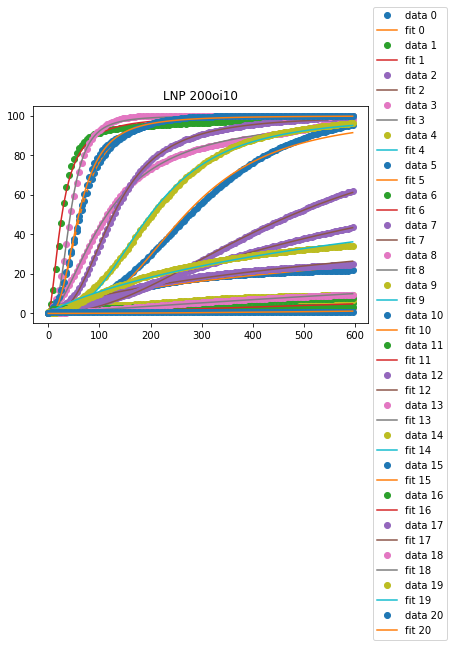

In [ ]:
fig, ax = plt.subplots()


for i in range(21):
    y_fit = FHill_dataset(out.params, i, xdata)    
    plt.plot(xdata, ydata[i, :], 'o', label='data {}'.format(i))
    plt.plot(xdata, y_fit, '-', label='fit {}'.format(i))

plt.title('LNP 200oi10')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.0));

In [ ]:
# extract fitting parameters into a dataframe
df_params = pd.DataFrame.from_dict(out.params.valuesdict(), orient='index')
df_params = pd.DataFrame(df_params.index.str.split("_").tolist(), columns=["parameter","data value"], index=df_params.index).merge(df_params, left_index=True, right_index=True).reset_index(drop=True).rename(columns={0:"value"})
df_params["data value"] = df_params["data value"].astype(int)

# correct data value to start at 0
df_params["data value"] = df_params["data value"] - 1
print("data value goes from ",df_params["data value"].min(), "to ", df_params["data value"].max())
df_params.head()

data value goes from  0 to  20


,parameter,data value,value
0,tau,0,62.483335
1,n,0,2.519729
2,tau,1,26.775406
3,n,1,1.748299
4,tau,2,728.225359


In [ ]:
# convert into pivot table for easier interpretability
df_params_pivot = pd.pivot_table(data=df_params, values="value",index="data value",columns="parameter")
df_params_pivot.head()

parameter,n,tau
data value,,
0,2.519729,62.483335
1,1.748299,26.775406
2,1.319316,728.225359
3,1.744634,114.771848
4,0.759758,10000.000000


In [ ]:
# join with info from the df_pivot table that the ydata (used to generate the parameters) came from
df_temp = df_pivot.columns.to_frame().reset_index(drop=True).merge(df_params_pivot, left_index=True, right_index=True)
df_temp.head()

,base,addition,concentration,n,tau
0,POPC LUV,200oi10 LNP,0.5X,2.519729,62.483335
1,POPC LUV,200oi10 LNP,1X,1.748299,26.775406
2,POPC LUV,304oi10 LNP,0.01X,1.319316,728.225359
3,POPC LUV,304oi10 LNP,0.1X,1.744634,114.771848
4,POPC LUV,306o10 LNP,0.5X,0.759758,10000.000000


In [ ]:
# join df_temp with df_melted
df_melted = df_melted.merge(df_temp, left_on=["base","addition","concentration"], right_on=["base","addition","concentration"])
df_melted

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU,RFU Std Normalized,n,tau
0,365.25,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,20.558136,1.431411,0.688613,3211.038916
1,645.25,F5,13731.913091,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13688.490398,339.271994,NaN,22.222651,1.424959,0.688613,3211.038916
2,655.25,F5,13742.626032,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13703.507579,336.502503,NaN,22.267646,1.413327,0.688613,3211.038916
3,660.25,F5,13752.129778,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13712.498304,329.271316,NaN,22.307562,1.382956,0.688613,3211.038916
4,665.25,F5,13740.017333,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13707.744804,346.032222,NaN,22.256689,1.453353,0.688613,3211.038916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,876.25,E11,47482.036096,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45673.145319,2665.387971,NaN,102.119858,7.068441,1.058203,10000.000000
10391,874.25,E11,47064.222597,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45357.139735,2492.987990,NaN,101.011843,6.611247,1.058203,10000.000000
10392,872.25,E11,46611.552331,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,45229.000784,1812.854852,NaN,99.811390,4.807577,1.058203,10000.000000
10393,870.25,E11,10608.352297,POPG LUV,304oi10 LNP,0.01X,20,POPG LUV - 0.01X 304oi10 LNP,10667.231351,182.070372,NaN,4.333175,0.482839,1.058203,10000.000000


In [ ]:
# generate fitted value at each timepoint give n and tau values

def full_FHill(t,tau,n):
  return 100 * (1+(tau/t) ** n) ** (-1)
  
df_melted["Fitted % Maximum RFU"] = full_FHill(df_melted["Time (min)"], df_melted["tau"], df_melted["n"])
df_melted.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU,RFU Std Normalized,n,tau,Fitted % Maximum RFU
0,365.25,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,20.558136,1.431411,0.688613,3211.038916,18.289051
1,645.25,F5,13731.913091,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13688.490398,339.271994,NaN,22.222651,1.424959,0.688613,3211.038916,24.879935
2,655.25,F5,13742.626032,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13703.507579,336.502503,NaN,22.267646,1.413327,0.688613,3211.038916,25.078390
3,660.25,F5,13752.129778,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13712.498304,329.271316,NaN,22.307562,1.382956,0.688613,3211.038916,25.176872
4,665.25,F5,13740.017333,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13707.744804,346.032222,NaN,22.256689,1.453353,0.688613,3211.038916,25.274865


### Plot fits individually

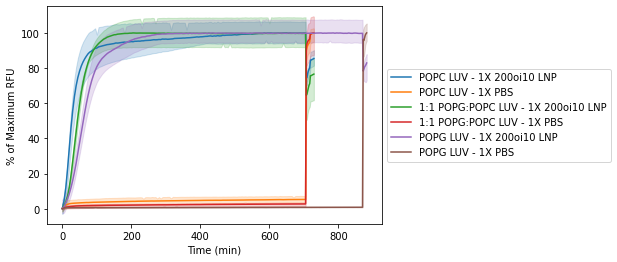

In [ ]:
fig, ax = plt.subplots()

temp_data = df_melted[(df_melted["addition"] == "200oi10 LNP") | (df_melted["addition"] == "PBS")]
temp_data = temp_data[temp_data["concentration"] == "1X"]

sns.lineplot(data=temp_data, x="Time (min)", y="% of Maximum RFU", hue="header", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
temp_data.header.unique()

array(['POPC LUV - 1X 200oi10 LNP', 'POPC LUV - 1X PBS',
       '1:1 POPG:POPC LUV - 1X 200oi10 LNP', '1:1 POPG:POPC LUV - 1X PBS',
       'POPG LUV - 1X 200oi10 LNP', 'POPG LUV - 1X PBS'], dtype=object)

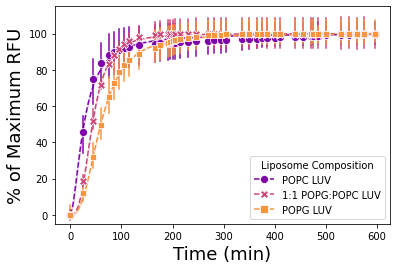

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "200oi10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "1X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette=palette,
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("25 ug/mL 200O_{i10} LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)


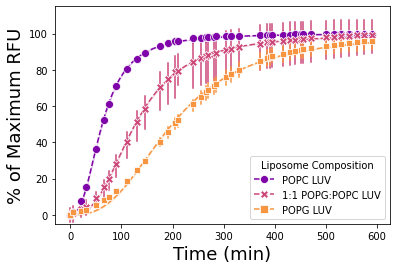

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "200oi10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "0.5X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                legend=False,
                palette=palette,
                linestyle="dashed",
                ax=ax)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=8,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)


#plt.title("12.5 ug/mL 200oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)

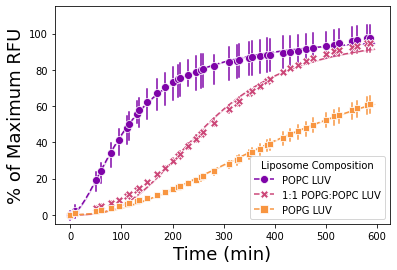

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "304oi10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "0.1X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette=palette,
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("2.5 ug/mL 304oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)


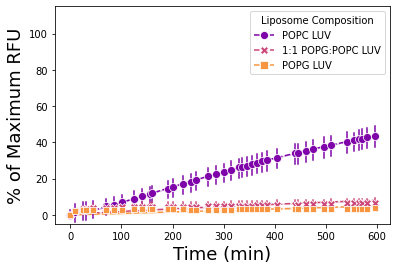

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "304oi10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "0.01X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette=palette,
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("0.25 ug/mL 304oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)


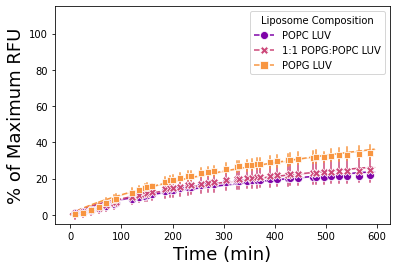

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "306o10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "1X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette=palette,
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("25 ug/mL 306oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)


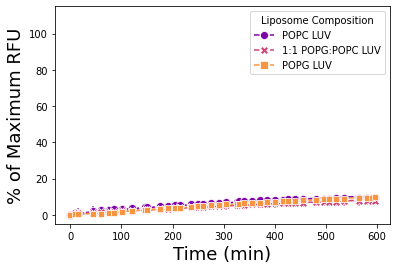

In [ ]:
fig, ax = plt.subplots(figsize=[6,4])

temp_data = df_melted[df_melted["addition"] == "306o10 LNP"]
temp_data = temp_data[temp_data["concentration"] == "0.5X"]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette=palette,
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette=palette,
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("12.5 ug/mL 306oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='Liposome Composition', labels=temp_data["base"].unique())

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)


## Plot dose profiles

''

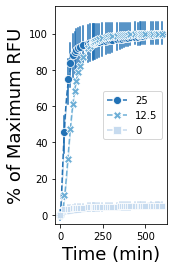

In [ ]:
fig, ax = plt.subplots(figsize=[2,4])

temp_data = df_melted[df_melted["base"] == "POPC LUV"]
temp_data = temp_data[(temp_data["addition"] == "200oi10 LNP") | (temp_data["addition"] == "PBS")]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

temp_data = temp_data.sort_values(by=["addition","concentration"], ascending=[True,False])

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette='Blues_r',
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette='Blues_r',
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("12.5 ug/mL 306oi10 LNP", fontsize=24)
plt.ylabel('% of Maximum RFU', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='', labels=['25','12.5','0'])

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)
;

''

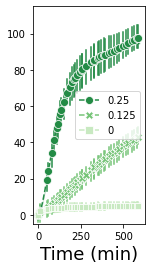

In [ ]:
fig, ax = plt.subplots(figsize=[2,4])

temp_data = df_melted[df_melted["base"] == "POPC LUV"]
temp_data = temp_data[(temp_data["addition"] == "304oi10 LNP") | (temp_data["addition"] == "PBS")]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

temp_data = temp_data.sort_values(by=["addition","concentration"], ascending=[True,False])

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette='Greens_r',
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette='Greens_r',
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("12.5 ug/mL 306oi10 LNP", fontsize=24)
plt.ylabel('', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='', labels=['0.25','0.125','0'])

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)
;

''

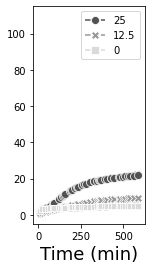

In [ ]:
fig, ax = plt.subplots(figsize=[2,4])

temp_data = df_melted[df_melted["base"] == "POPC LUV"]
temp_data = temp_data[(temp_data["addition"] == "306o10 LNP") | (temp_data["addition"] == "PBS")]

temp_data = temp_data[temp_data["Time (min)"] <= 600]

temp_data = temp_data.sort_values(by=["addition","concentration"], ascending=[True,False])

# plot FITTED data as scattered markers
sns.lineplot(data=temp_data,
                x="Time (min)",
                y="Fitted % Maximum RFU",
                hue="header",
                color="k",
                palette='Greys_r',
                linestyle="dashed",
                ax=ax,
                legend=False)

# plot REAL data with shaded error bars
sns.lineplot(data=temp_data[temp_data['Time (min)'].isin(temp_data["Time (min)"].unique()[::3])], 
              x="Time (min)", 
              y="% of Maximum RFU", 
              hue="header",
              style="header",
              markers=True,
              markersize=markersize,
              linewidth = 0.0,
              err_style="bars",
              palette='Greys_r',
              ax=ax)

ax.set_ylim(bottom=-5, top=115)

#plt.title("12.5 ug/mL 306oi10 LNP", fontsize=24)
plt.ylabel('', fontsize=18)
plt.xlabel('Time (min)', fontsize=18)

legend = plt.legend(title='', labels=['25','12.5','0'])

legend.legendHandles[0]._legmarker.set_marker("o")
legend.legendHandles[1]._legmarker.set_marker("X")
legend.legendHandles[2]._legmarker.set_marker("s")

legend.legendHandles[0]._legmarker.set_markersize(markersize)
legend.legendHandles[1]._legmarker.set_markersize(markersize)
legend.legendHandles[2]._legmarker.set_markersize(markersize)
;

## Calculate error for each curve

In [ ]:
# calculate error for each value
df_melted["error"] = df_melted["% of Maximum RFU"] - df_melted["Fitted % Maximum RFU"]
df_melted["abs error"] = np.abs(df_melted["error"])
df_melted["abs error squared"] = df_melted["abs error"] ** 2
df_melted.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU,RFU Std Normalized,n,tau,Fitted % Maximum RFU,error,abs error,abs error squared
0,365.25,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,20.558136,1.431411,0.688613,3211.038916,18.289051,2.269085,2.269085,5.148748
1,645.25,F5,13731.913091,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13688.490398,339.271994,NaN,22.222651,1.424959,0.688613,3211.038916,24.879935,-2.657284,2.657284,7.061157
2,655.25,F5,13742.626032,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13703.507579,336.502503,NaN,22.267646,1.413327,0.688613,3211.038916,25.078390,-2.810744,2.810744,7.900281
3,660.25,F5,13752.129778,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13712.498304,329.271316,NaN,22.307562,1.382956,0.688613,3211.038916,25.176872,-2.869310,2.869310,8.232941
4,665.25,F5,13740.017333,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13707.744804,346.032222,NaN,22.256689,1.453353,0.688613,3211.038916,25.274865,-3.018176,3.018176,9.109386


In [ ]:
df_melted[(df_melted["header"] == "POPG LUV - 1X PBS") & (df_melted["Time (min)"] <= 600)].mean()

<ipython-input-68-83dad64a68c6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_melted[(df_melted["header"] == "POPG LUV - 1X PBS") & (df_melted["Time (min)"] <= 600)].mean()


Time (min)               292.870902
RFU                     8609.604112
temperature               20.000000
Average RFU             8609.604112
RFU std                   45.284228
RFU Norm                   0.492377
% of Maximum RFU           0.635369
RFU Std Normalized         0.132135
n                          1.576469
tau                     9999.696158
Fitted % Maximum RFU       0.444879
error                      0.190489
abs error                  0.311886
abs error squared          0.132665
dtype: float64

In [ ]:
# create pivot table of parameters and errors for each header (remember that I cut off values over 600 minutes, so do the same here before applying aggfunc)
pd.pivot_table(data=df_melted[df_melted["Time (min)"] <= 600], values="abs error squared", index=["base","addition","concentration"], aggfunc="mean")

abs error squared
base              addition    concentration                   
POPC LUV          200oi10 LNP 0.5X                    2.962130
                              1X                     52.923926
                  304oi10 LNP 0.01X                  17.969777
                              0.1X                   43.816974
                  306o10 LNP  0.5X                    1.242449
                              1X                      2.511312
                  PBS         1X                      5.030744
1:1 POPG:POPC LUV 200oi10 LNP 0.5X                   77.845660
                              1X                     37.927733
                  304oi10 LNP 0.01X                   6.095594
                              0.1X                    8.189129
                  306o10 LNP  0.5X                    1.604792
                              1X                     19.617413
                  PBS         1X                      1.620573
POPG LUV          200oi10 LNP 0.5X                   10.489777
                              1X                     39.052296
                  304oi10 LNP 0.01X                   1.954527
                              0.1X                    5.575435
                  306o10 LNP  0.5X                    0.747045
                              1X                      6.941429
                  PBS         1X                      0.132665

In [ ]:
df_melted.head()

,Time (min),Well,RFU,base,addition,concentration,temperature,header,Average RFU,RFU std,RFU Norm,% of Maximum RFU,RFU Std Normalized,n,tau,Fitted % Maximum RFU,error,abs error,abs error squared
0,365.25,F6,13335.604685,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13037.616961,340.808038,NaN,20.558136,1.431411,0.688613,3211.038916,18.289051,2.269085,2.269085,5.148748
1,645.25,F5,13731.913091,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13688.490398,339.271994,NaN,22.222651,1.424959,0.688613,3211.038916,24.879935,-2.657284,2.657284,7.061157
2,655.25,F5,13742.626032,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13703.507579,336.502503,NaN,22.267646,1.413327,0.688613,3211.038916,25.078390,-2.810744,2.810744,7.900281
3,660.25,F5,13752.129778,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13712.498304,329.271316,NaN,22.307562,1.382956,0.688613,3211.038916,25.176872,-2.869310,2.869310,8.232941
4,665.25,F5,13740.017333,POPC LUV,306o10 LNP,1X,20,POPC LUV - 1X 306o10 LNP,13707.744804,346.032222,NaN,22.256689,1.453353,0.688613,3211.038916,25.274865,-3.018176,3.018176,9.109386


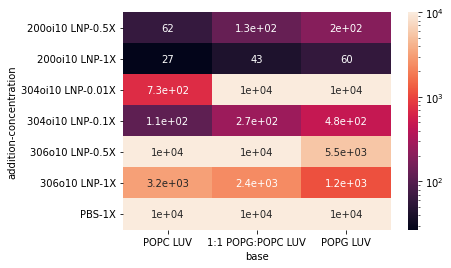

In [ ]:
taus = pd.pivot_table(data=df_melted, values="tau",index=["addition","concentration"],columns="base")
sns.heatmap(taus, annot=True, norm=LogNorm())

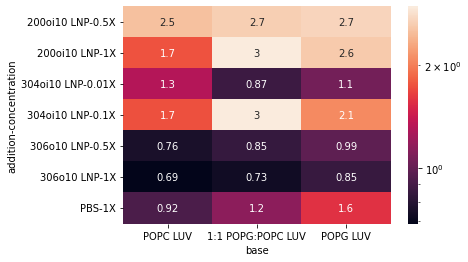

In [ ]:
ns = pd.pivot_table(data=df_melted, values="n",index=["addition","concentration"],columns="base")
sns.heatmap(ns, annot=True, norm=LogNorm())

In [ ]:
df_melted.to_csv('/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/df_melted.csv')

In [ ]:
path

'/content/gdrive/MyDrive/Research/AL Data/B3P118 - LNP + LUV/B3P118 - LUV + LNP.xlsx'